# Graphs: crash course


Jupyter notebook version of [tutorial](https://iaee.substack.com/p/graphs-intuitively-and-exhaustively) from the [intuitively and exhaustively explained blog](https://iaee.substack.com).

## Defining

In this article, we’ll be using networkx, a popular Python library for defining, manipulating, and visualizing graphs. In networkx You can define a graph like so:

In [1]:
import networkx as nx

graph = nx.Graph()

Then, you can add edges to that graph

In [2]:
graph.add_edge(1,2)
graph.add_edge(1,3)
graph.add_edge(1,4)
graph.add_edge(4,2)

Typically, the nodes and edges in a graph are a “set”, which is a mathematical term meaning each node and each edge is unique. You can only have one node with a value 1 , and you can only have one edge connecting node 1 with node 2 , for instance.

Because of this constraint, networkx can automatically infer if you want a node to be created. If you’re adding an edge to node 4 , and node 4 doesn’t already exist in the set of all nodes, networkx will automatically create node 4 for you. If you’re connecting an edge to a node you’ve already created, networkx will handle that automatically as well.

We can go ahead and draw out our graph. Here, I’m using matplotlib to manipulate the figure the graph is plotted on, but that’s purely for visualization purposes.

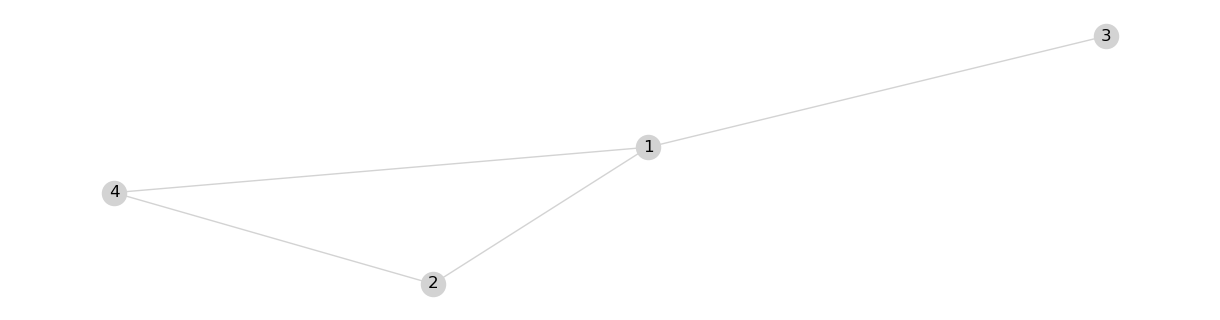

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
nx.draw(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

### Nodes can be anything

It’s worth noting that there’s nothing implicitly special about the values 1,2,3,4 . You can use strings, like "A", "B", "C", "D"

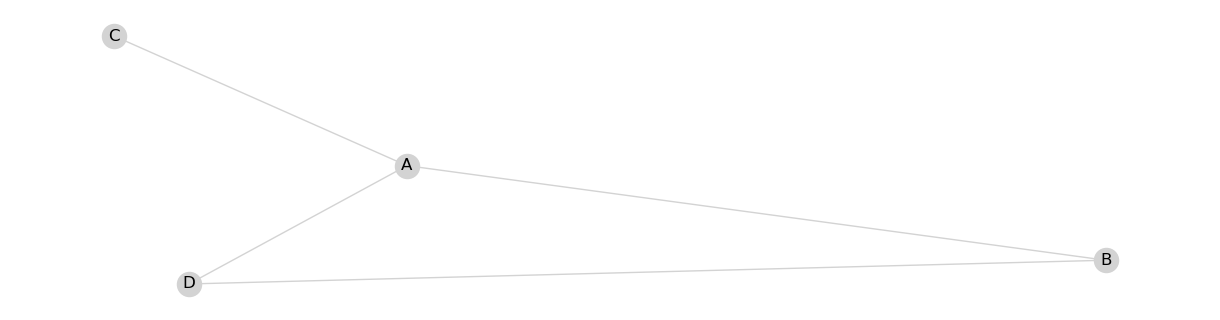

In [4]:
graph = nx.Graph()

graph.add_edge('A','B')
graph.add_edge('A','C')
graph.add_edge('A','D')
graph.add_edge('D','B')

plt.figure(figsize=(12, 3))
nx.draw(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

The values of the nodes can be tuples

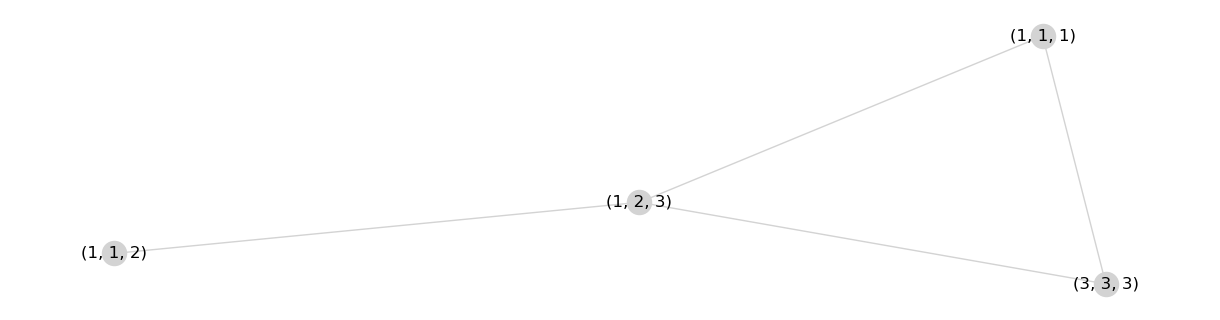

In [5]:
graph = nx.Graph()

graph.add_edge((1,2,3),(1,1,1))
graph.add_edge((1,2,3),(1,1,2))
graph.add_edge((1,2,3),(3,3,3))
graph.add_edge((3,3,3),(1,1,1))

plt.figure(figsize=(12, 3))
nx.draw(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

They can even be functions

In [6]:
def func_a(arg):
    print('a', arg)

def func_b(arg):
    print('b', arg)

def func_c(arg):
    print('c', arg)

def func_d(arg):
    print('d', arg)

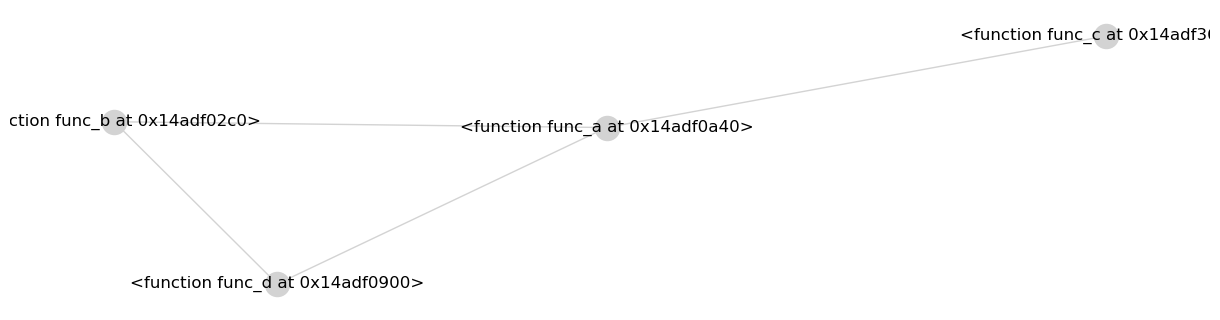

In [7]:
graph = nx.Graph()

graph.add_edge(func_a,func_b)
graph.add_edge(func_a,func_c)
graph.add_edge(func_a,func_d)
graph.add_edge(func_d,func_b)

plt.figure(figsize=(12, 3))
nx.draw(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

The only constraint is that the values have to be “hashable”, meaning your programming language can turn the values into a representation such that it can compare two nodes. This is important for ensuring that nodes are a set and that there aren’t duplicates. If you’re curious about how this shakes out, research the `hash` function in Python.

## Graphs can be rendered in infinite ways

You might have noticed that each of the graphs we rendered looks slightly different. If we use the nx.draw function to draw the same graph multiple times, we’ll get several different views of the same graph.

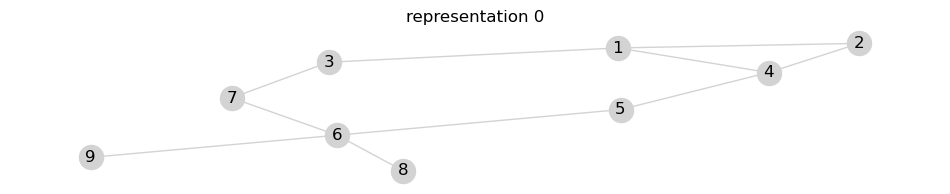

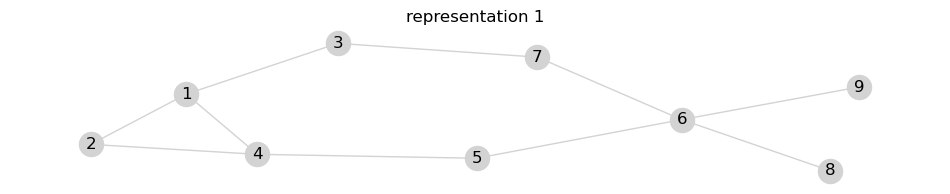

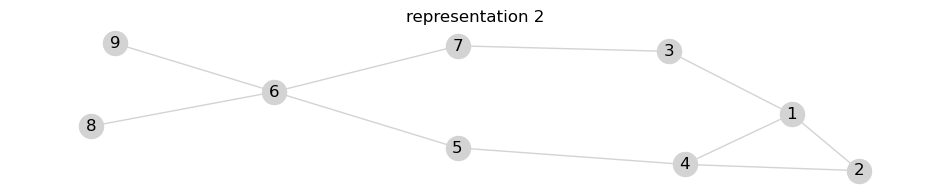

In [8]:
#creating graph
graph = nx.Graph()

#adding edges
graph.add_edge(1,2)
graph.add_edge(1,3)
graph.add_edge(1,4)
graph.add_edge(4,2)
graph.add_edge(4,5)
graph.add_edge(6,5)
graph.add_edge(6,7)
graph.add_edge(6,8)
graph.add_edge(6,9)
graph.add_edge(3,7)

#rendering same graph three times
for i in range(3):
    plt.figure(figsize=(12, 2))
    plt.title(f'representation {i}')
    nx.draw(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

Drawing the same graph three times yields three different representations. There is no implicit locational information in a graph, just relative information about which nodes are connected. Thus, there is an infinite number of ways a graph can be rendered.

networkx has a few handy functions that allow you to render the same graph in a variety of ways:

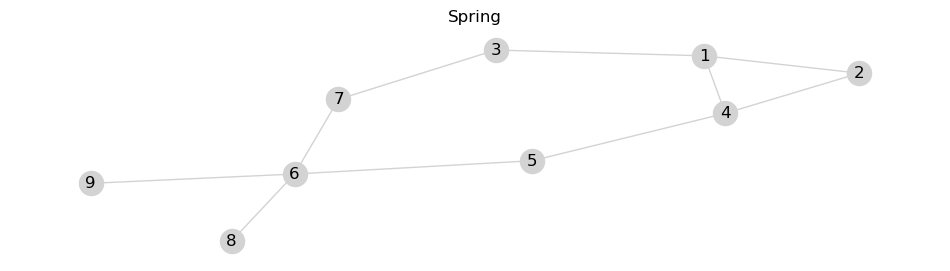

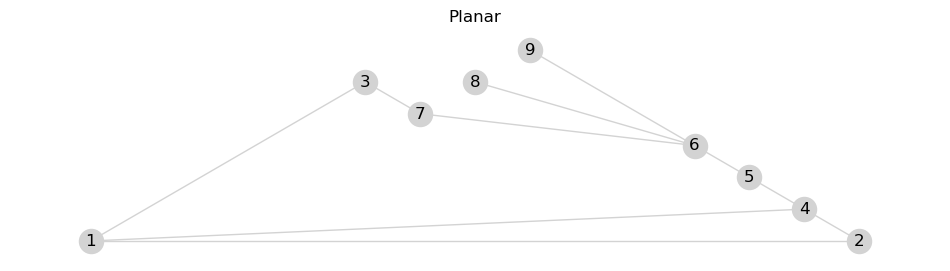

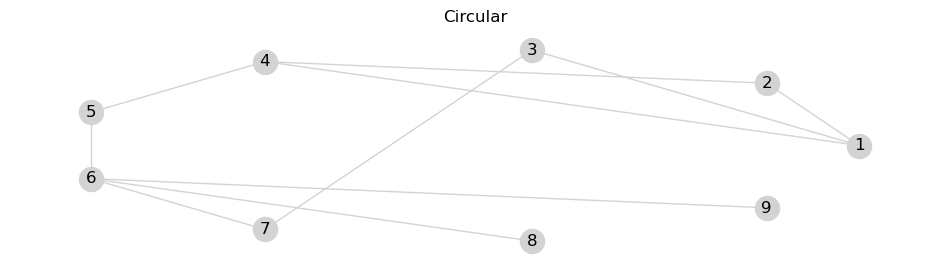

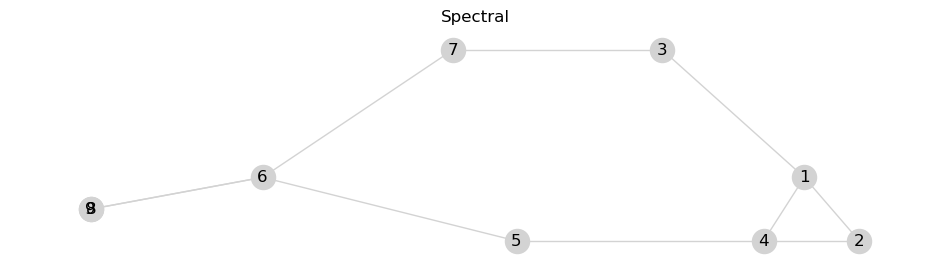

In [9]:
graph = nx.Graph()

graph.add_edge(1,2)
graph.add_edge(1,3)
graph.add_edge(1,4)
graph.add_edge(4,2)
graph.add_edge(4,5)
graph.add_edge(6,5)
graph.add_edge(6,7)
graph.add_edge(6,8)
graph.add_edge(6,9)
graph.add_edge(3,7)

plt.figure(figsize=(12, 3))
plt.title('Spring')
nx.draw_spring(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

plt.figure(figsize=(12, 3))
plt.title('Planar')
nx.draw_planar(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

plt.figure(figsize=(12, 3))
plt.title('Circular')
nx.draw_circular(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

plt.figure(figsize=(12, 3))
plt.title('Spectral')
nx.draw_spectral(graph, with_labels=True, node_color='lightgray', edge_color='lightgray')

Here:

- Spring imagines each edge as a spring that exhibits some force. The nodes are placed randomly, and the springs are allowed to exert their force until the graph reaches an equilibrium.
- Planar tries to get all the nodes to be placed such that the edges in the graph do not cross. This isn’t always possible.
- Circular arranges all the nodes, sequentially, in a circle.
- Spectral uses some fancy math, using something called eigen vectors, to decide on a layout. This example isn’t very good, but this approach can be very helpful when dealing with complex graphs.

Now that we have a handle on some of the basics, let’s dig into the various flavors of graphs.